In [2]:
from pathlib import Path
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.indexes.datetimes import DatetimeIndex

# -------------------------------------------------------------------
# Define the base data directory (relative to this script's location)
# -------------------------------------------------------------------
DATA_DIR = Path.cwd() / "data"
file_path = DATA_DIR / "api.json"

In [3]:
def get_eia_api_key(json_file_path):
    try:
        with open(json_file_path, 'r') as f:
            json_data = json.load(f)
            api_key = json_data.get("key")
            if api_key:
                return api_key
            else:
                print(f"Error: 'key' not found in {file_path}")
                return None
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Make sure it exists.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [4]:
EIA_API_KEY = get_eia_api_key(file_path)

if EIA_API_KEY:
    print("API Key successfully loaded.")
else:
    print("Could not load the API key. Please check the file.")

API Key successfully loaded.


In [5]:
BASE_URL = "https://api.eia.gov/v2/"
ROUTE = "electricity/rto/daily-region-sub-ba-data/data/"

# Define other query parameters (frequency, date range, sorting)
params = [
    ("frequency", "daily"),
    # Fix 'data': Use 'data[0]' explicitly
    ("data[0]", "value"),
    # Fix 'facets': Unroll the subba list, using 'facets[subba][]' for each item
    ("facets[subba][]", "PGAE"),
    ("facets[subba][]", "SCE"),
    ("facets[subba][]", "SCE"),
    ("facets[subba][]", "SDGE"),
    ("facets[subba][]", "SDGE"),
    ("facets[subba][]", "VEA"),
    ("facets[subba][]", "VEA"),
    
    # Simple parameters can be added directly
    ("offset", 0),
    ("length", 5000),
    ("api_key", EIA_API_KEY)
    
    # Note: 'start', 'end', and 'sort' (if empty) can be omitted entirely
    # or you can add them as ('start', None) if necessary.
]

full_url = BASE_URL + ROUTE

try:
    response = requests.get(full_url, params=params)
    response.raise_for_status() # Raise an exception for bad status codes

    data = response.json()
    
    # 3. Extract the data and convert to a pandas DataFrame
    df = pd.DataFrame(data['response']['data'])
    
    print("Successfully downloaded data:")
    print(df.head())
    
except requests.exceptions.RequestException as e:
    print(f"Error during API request: {e}")
except KeyError:
    print("Error: Could not parse JSON response (check your route and parameters).")



Successfully downloaded data:
       period subba                subba-name parent  \
0  2025-11-05  PGAE  Pacific Gas and Electric   CISO   
1  2025-11-05  PGAE  Pacific Gas and Electric   CISO   
2  2025-11-05  PGAE  Pacific Gas and Electric   CISO   
3  2025-11-05  PGAE  Pacific Gas and Electric   CISO   
4  2025-11-05  PGAE  Pacific Gas and Electric   CISO   

                              parent-name  timezone   value    value-units  
0  California Independent System Operator   Arizona  259338  megawatthours  
1  California Independent System Operator   Central  258917  megawatthours  
2  California Independent System Operator   Eastern  258733  megawatthours  
3  California Independent System Operator  Mountain  259338  megawatthours  
4  California Independent System Operator   Pacific  259729  megawatthours  


In [6]:
print(len(df))
print(full_url)
df.head(50)

5000
https://api.eia.gov/v2/electricity/rto/daily-region-sub-ba-data/data/


,period,subba,subba-name,parent,parent-name,timezone,value,value-units
0,2025-11-05,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Arizona,259338,megawatthours
1,2025-11-05,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Central,258917,megawatthours
2,2025-11-05,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Eastern,258733,megawatthours
3,2025-11-05,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Mountain,259338,megawatthours
4,2025-11-05,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Pacific,259729,megawatthours
5,2025-11-05,SCE,Southern California Edison,CISO,California Independent System Operator,Arizona,283604,megawatthours
6,2025-11-05,SCE,Southern California Edison,CISO,California Independent System Operator,Central,283693,megawatthours
7,2025-11-05,SCE,Southern California Edison,CISO,California Independent System Operator,Eastern,283695,megawatthours
8,2025-11-05,SCE,Southern California Edison,CISO,California Independent System Operator,Mountain,283604,megawatthours
9,2025-11-05,SCE,Southern California Edison,CISO,California Independent System Operator,Pacific,283553,megawatthours


In [7]:
df_clean = df[['period', 'value']]
# df_clean.head()

In [8]:
# plt.plot(df_clean['period'][:100], df_clean['value'][:100])

In [9]:
df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')

df_clean = df_clean.groupby("period", as_index=False)["value"].sum()

df_clean.iloc[:,0] = pd.to_datetime(df_clean.iloc[:,0])
df_clean.set_index(df_clean.columns[0], inplace=True)

df_clean.head()

/var/folders/55/jq27sjjd46d27s__m84b78q40000gn/T/ipykernel_94974/2831332117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')
/opt/miniconda3/envs/ME276/lib/python3.11/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,value
period,
2025-02-25,2740352
2025-02-26,2711871
2025-02-27,2770760
2025-02-28,2671276
2025-03-01,2522695


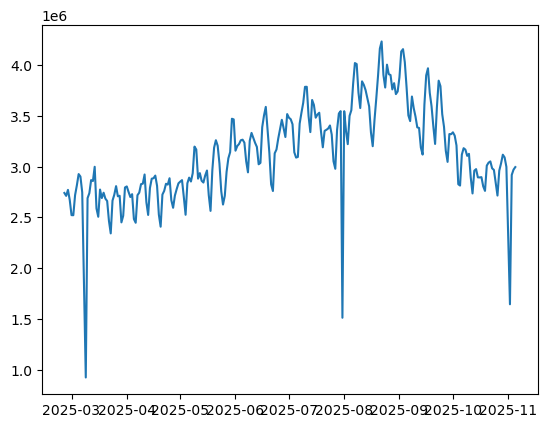

In [10]:
plt.plot( df_clean['value'])

In [11]:
def split_data(pt,pv, raw_data):

    assert(pt>=0)
    assert(pv>=0)
    assert(pt+pv<=1)

    segment_train = int(len(raw_data)*pt)
    segment_validate = int(len(raw_data)*pv)
    
    data_train = raw_data.iloc[:segment_train,:].copy()
    data_validate = raw_data.iloc[segment_train:(segment_train+segment_validate),:].copy()
    data_test = raw_data.iloc[segment_train+segment_validate:,:].copy()
    
    return data_train, data_validate, data_test

In [12]:
data_train, data_validate, data_test = split_data(0.7, 0.1, df_clean)

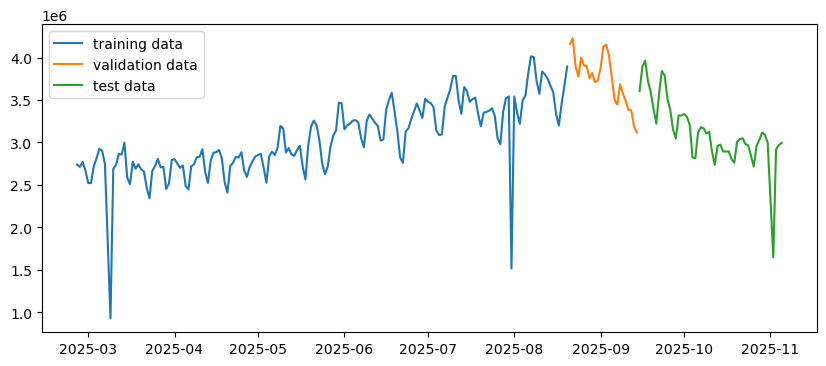

In [13]:
plt.figure(figsize=(10,4))
plt.plot(data_train,label='training data')
plt.plot(data_validate,label='validation data')
plt.plot(data_test,label='test data')
plt.legend()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_train)

data_train['scaled'] = scaler.transform(data_train)
data_validate['scaled'] = scaler.transform(data_validate)
data_test['scaled'] = scaler.transform(data_test)

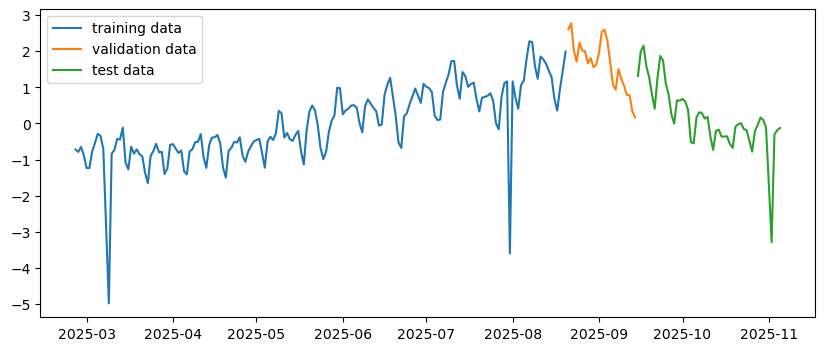

In [15]:
plt.figure(figsize=(10,4))
plt.plot(data_train['scaled'],label='training data')
plt.plot(data_validate['scaled'],label='validation data')
plt.plot(data_test['scaled'],label='test data')
plt.legend()

In [16]:
def organize_data(d,F,T):

    N = d.shape[0]
    Np = N - F - T + 1
    X = np.empty((Np,T))
    Y = np.empty(Np)
    t = np.empty(Np,dtype=DatetimeIndex)

    # print(d)
    # Fill in X, Y, and t
    for i in range(Np):
        X[i, :] = d.iloc[i : i+T].transpose()
        Y[i] = d.iloc[i + T - 1 + F] 
        t[i] = d.index[i + T]

    return X, Y, t

In [17]:
from pandas import Timestamp
T = 6
F = 12
Xtrain, ytrain, ttrain = organize_data(data_train['scaled'], F, T)
Xvalid, yvalid, tvalid = organize_data(data_validate['scaled'], F, T)
Xtest, ytest, ttest = organize_data(data_test['scaled'], F, T)

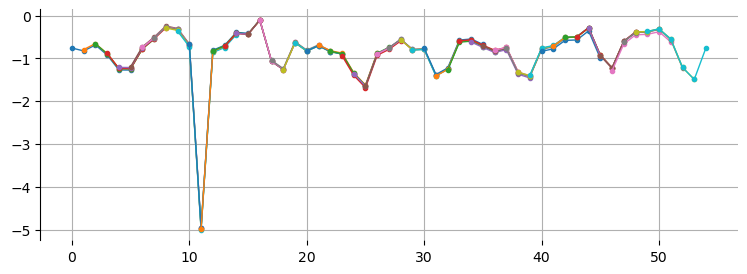

In [18]:
fig, ax = plt.subplots(figsize=(9,3))
for i in range(50):
    ax.plot(range(i,i+T),Xtrain[i,:]+np.random.normal(scale=0.02),marker='.',linewidth=1)
ax.spines[['top','right','bottom']].set_visible(False)
ax.grid()

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(Xtrain, ytrain)

In [20]:
from sklearn.metrics import mean_absolute_error

def assess(x_current,y,yhat):
    y = np.array(y).flatten()
    yhat = np.array(yhat).flatten()
    x_current = np.array(x_current).flatten()
    
    mae_m = sum(abs(y-yhat))/len(y)
    mae_b = sum(abs(y-x_current))/len(y)
    perf = 1 - (mae_m/mae_b)

    return perf

In [21]:
def append_day(X,t):
    t = np.array([i.day for i in t])
    t = t.reshape(t.shape[0], 1)
    return np.hstack((X, t))

In [22]:
Xtrain_day = append_day(Xtrain,ttrain)
Xvalid_day = append_day(Xvalid, tvalid)
Xtest_day = append_day(Xtest, ttest)
# Xtrain_day[:5,:]

In [23]:
linreg_day = LinearRegression().fit(Xtrain_day, ytrain)
linreg_perf = assess(Xvalid[:,-1], yvalid, linreg.predict(Xvalid))
linreg_day_perf = assess(Xvalid_day[:,-2], yvalid, linreg_day.predict(Xvalid_day))
print(linreg_perf)
print(linreg_day_perf)

0.012853907763266892
-0.03899112636110802


In [24]:
from tensorflow.keras.layers import LSTM
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

ki = GlorotUniform(seed=2434) # This is needed for reproducibility of the results

random.seed(2434)  # Do not change this. It is needed to ensure repeatability.

model_lstm = Sequential([
    LSTM(16, input_shape=(Xtrain_day.shape[1],1), return_sequences=True, kernel_initializer=ki),
    LSTM(16, return_sequences=True, kernel_initializer=ki),
    LSTM(8, kernel_initializer=ki),
    Dense(1, kernel_initializer=ki)
])

model_lstm.compile( optimizer="rmsprop", loss="mse", metrics=["mae"] )
history_lstm = model_lstm.fit(x=Xtrain_day, y=ytrain, epochs=10, validation_data=(Xvalid_day,yvalid))
print('Validation: ',assess(Xvalid[:,-1],yvalid,model_lstm.predict(Xvalid_day)))
lstm_perf = assess(Xvalid[:,-1],yvalid,model_lstm.predict(Xvalid_day))

Epoch 1/10


/opt/miniconda3/envs/ME276/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.8287 - mae: 0.7571 - val_loss: 0.4933 - val_mae: 0.5973
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7390 - mae: 0.7062 - val_loss: 0.2947 - val_mae: 0.4725
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6692 - mae: 0.6577 - val_loss: 0.1862 - val_mae: 0.3722
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6068 - mae: 0.6090 - val_loss: 0.1521 - val_mae: 0.3069
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5612 - mae: 0.5645 - val_loss: 0.1792 - val_mae: 0.3400
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5230 - mae: 0.5255 - val_loss: 0.2194 - val_mae: 0.3810
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4984 - mae: 0.5000 - val_loss: 0.2738 - val_mae: 0.4250
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4859 - mae: 0.4835 - val_loss: 0.3201 - val_mae: 0.4629
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4747 - mae: 0.4703 - val_loss: 0.3210 -

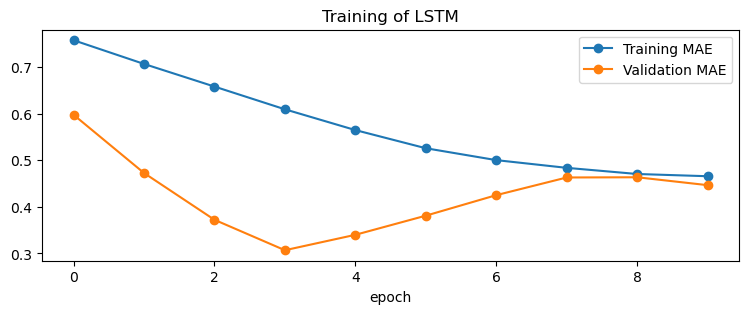

In [25]:
num_epochs = len(history_lstm.epoch)
plt.figure(figsize=(9,3))
plt.plot(range(num_epochs), history_lstm.history["mae"],marker='o', label="Training MAE")
plt.plot(range(num_epochs), history_lstm.history["val_mae"],marker='o', label="Validation MAE")
plt.xlabel('epoch')
plt.title("Training of LSTM")
plt.legend()

In [26]:
# best_perf = float(assess(Xvalid_day[:,-1],yvalid,model_lstm.predict(Xvalid_day)))
# print(best_perf)

best_perf = float(assess(Xtest[:,-1],ytest,model_lstm.predict(Xtest_day)))
print(best_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
-0.17890200603932627


In [ ]:
# df.to_csv("output.csv", index=False)